<h1 style="text-align:center;">UNIVERSIDAD DE LAS AMÉRICAS</h1>

<h3 style="text-align:center;">Programa de Posgrado / Inteligencia de Negocios y Ciencia de Datos</h3>

<h5 style=""><strong>Estudiante:</strong> Selena Pozo Barahona</h5>

#### __PARTE 1:__

##### __1: Importe la base de datos de la tarea de la semana 1 (Dummy Data.csv) en Jupyter Notebook.__ 

In [1]:
# Importamos las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importamos la BDD DummyDataHSS.csv
df=pd.read_csv("DummyDataHSS.csv")
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [4]:
# Verificamos si hay datos perdidos.
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [5]:
# Eliminamos los valores faltantes (NaN)
df=df.dropna()

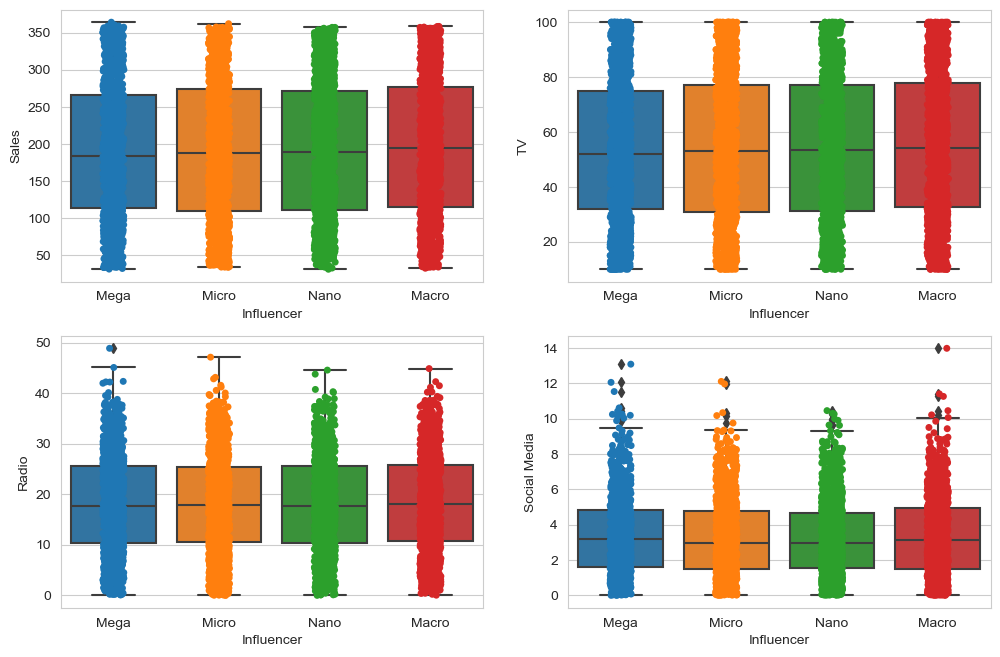

In [14]:
# Damos un poquito de diseño a nuestros gráficos
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')

plt.subplot(3,2,1)
ax= sns.boxplot(x='Influencer',y='Sales',data=df)
ax = sns.stripplot(x='Influencer',y='Sales',data=df)

plt.subplot(3,2,2)
ax= sns.boxplot(x='Influencer',y='TV',data=df)
ax = sns.stripplot(x='Influencer',y='TV',data=df)

plt.subplot(3,2,3)
ax= sns.boxplot(x='Influencer',y='Radio',data=df)
ax = sns.stripplot(x='Influencer',y='Radio',data=df)

plt.subplot(3,2,4)
ax= sns.boxplot(x='Influencer',y='Social Media',data=df)
ax = sns.stripplot(x='Influencer',y='Social Media',data=df)

In [15]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los
Q1 = df.Radio.quantile(0.25)
Q3 = df.Radio.quantile(0.75)
IQR = Q3 - Q1 #rango intercuartil
print(IQR)

15.085248102500003


In [16]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5
df = df[~((df['Radio'] < (Q1 - 1.5 * IQR)) |(df['Radio'] > (Q3 + 1.5 * IQR)))]
df.shape

(4545, 5)

In [17]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los
Q1 = df['Social Media'].quantile(0.25)
Q3 = df['Social Media'].quantile(0.75)
IQR = Q3 - Q1 #rango intercuartil
print(IQR)

3.2732564039999996


In [19]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5
df = df[~((df['Social Media'] < (Q1 - 1.5 * IQR)) |(df['Social Media'] > (Q3 + 1.5 * IQR)))]
df.shape

(4517, 5)

De acuerdo a lo observado en los diagramas de cajas, podemos identificar datos que salen de los cuartiles y que identificaremos como atipicos dentro de las variables numericas Radio y Social Media que representan el presupuesto de cada influencer en millones.

##### __2: Escoja su variable objetivo y las variables independientes considerando un enfoque de regresión lineal.__

<h5 style="text-align:center;"><strong>Inicializamos el modelo</strong></h5>

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Recodificamos las variables categóricas
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas =df.select_dtypes('object').columns

In [22]:
# Utilizamos Label Encoder para codificar.
from sklearn.preprocessing import LabelEncoder
# Creamos la instancia de Label Encoder.
labelencoder = LabelEncoder()
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

Separamos a los predictores de nuestra variable objetivo que sera sales:

In [23]:
X = df[df.columns.difference(['Sales'])]
y = df.Sales

Para este estudio nuestra variable objetivo será "Sales", por lo cual separamos a los predictores de nuestra variable dependiente.

##### __3: Realice un train/test split, separando un 90% de los datos para la submuestra de entrenamiento y 10% para la submuestra de prueba.__

Como nuestra base de datos no contine la variable tiempo, podemos realizar un train/split aleatorio de la siguiente forma:

In [25]:
# Importamos del module sklearn la función: train_test_split
from sklearn.model_selection import train_test_split

Dividimos en dos partes a nuestra base de datos en un 90% para que el algoritmo entrene y un 10% para aplicar nuestras métricas de desempeño.

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.10,random_state =123)

In [27]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(4065, 4)  <class 'pandas.core.frame.DataFrame'>
(4065,) 	  <class 'pandas.core.series.Series'>
(452, 4)  <class 'pandas.core.frame.DataFrame'>
(452,) 	  <class 'pandas.core.series.Series'>


##### __4: Entrene al modelo de regresión lineal por sklearn.__

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a entrenar al modelo:

In [28]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [29]:
LinearRegression()

LinearRegression()

In [30]:
# Realizar las predicciones.
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

##### __5: Evalúe su modelo. ¿Es este aceptable?, para ello escoja las métricas correspondientes.__

<h5 style="text-align:center;"><strong>Métricas de Evaluación</strong></h5>

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

<h5 style=""><strong>MSE</strong></h5>

In [32]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

8.768051033716493
8.1671116295851


<h5 style=""><strong>RMSE</strong></h5>

In [33]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

2.9610895011323946
2.8578158844798067


<h5 style=""><strong>MAE</strong></h5>

In [34]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

2.3703184004097895
2.3281577092228605


<h5 style=""><strong>R^2</strong></h5>

In [35]:
from sklearn.metrics import r2_score

In [36]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.9989827074141471
El R^2 del subconjunto de prueba es: 0.9990527582048809


In [39]:
# Imprime el intercepto.
print('Intercepto:', modelo_regresion.intercept_)

Intercepto: -0.13047219950200883


In [40]:
# Imprime la pendiente.
print('Pendiente:', modelo_regresion.coef_) 

Pendiente: [-2.07175872e-02 -4.74292089e-03 -2.67635799e-03  3.56350257e+00]


El coeficiente determina la calidad del modelo para replicar los resultados. Mide la proporción de la variabilidad total observada en la respuesta que es explicada por la asociación lineal, el valor obtenido tanto para los datos de entrenamiento como para los de prueba es cercano a 1.

##### __6: Compare sus predicciones con los datos reales mediante un gráfico.__

<h5 style=""><strong>Predicciones en el subgrupo de entrenamiento.</strong></h5>

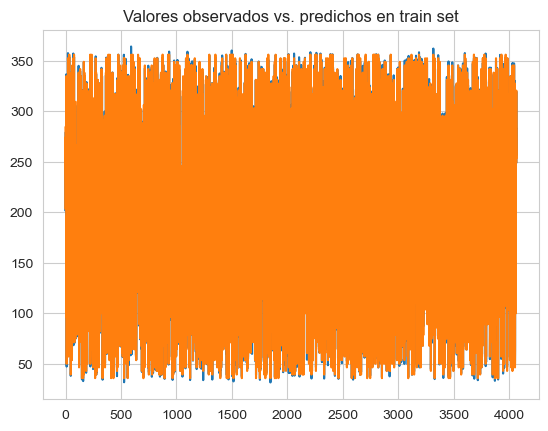

In [41]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

<h5 style=""><strong>Predicciones en el subgrupo de prueba.</strong></h5>

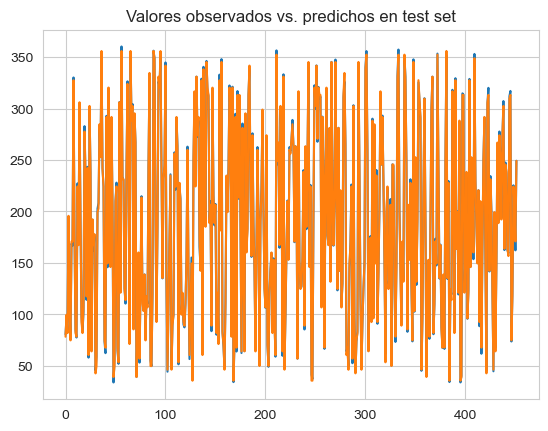

In [42]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

##### __7: Identifique a las dos variables con  mayor poder explicativo en el modelo ¿Cómo las identificó?__

<h5 style="text-align:center;"><strong>Feature Importance</strong></h5>

En este apartado vamos a calcular la importancia de cada variable independiente en nuestro modelo, para identificar las variables que nos serán más útiles para predecir nuestro modelo.

<h5 style=""><strong>Normalizar las variables.</strong></h5>

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

In [45]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

<h5 style=""><strong>Entrenar el modelo con los datos de entrenamiento.</strong></h5>

In [46]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

<h5 style=""><strong>Realizar las predicciones.</strong></h5>

In [48]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

<h5 style=""><strong>R^2</strong></h5>

In [49]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.9989827074141471
El R^2 del subconjunto de prueba es: 0.9990527582048809


<h5 style=""><strong>Predicciones en el subgrupo de entrenamiento.</strong></h5>

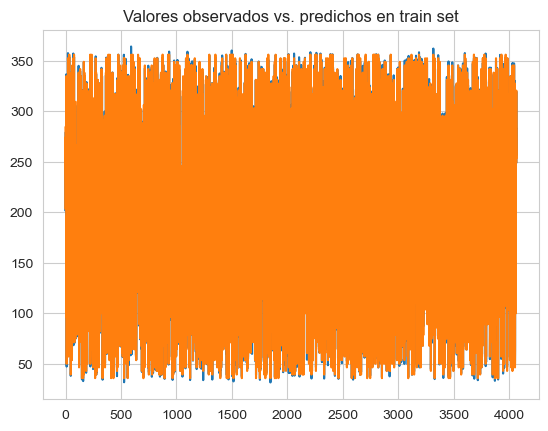

In [50]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

<h5 style=""><strong>Predicciones en el subgrupo de prueba.</strong></h5>

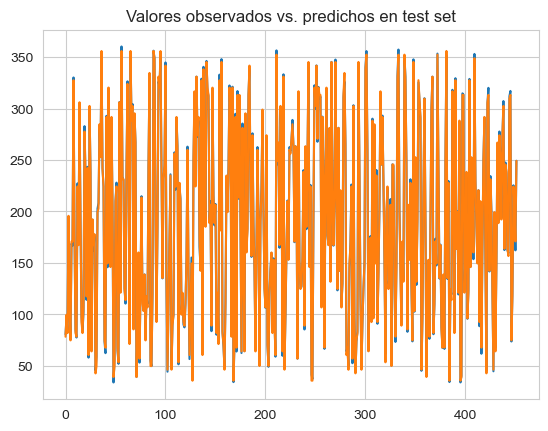

In [51]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

<h5 style=""><strong>Extraer los Coeficientes.</strong></h5>

In [52]:
importancia = modelo_regresion_std.coef_

In [53]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -0.02302
Variable explicativa No. 1, Score: -0.04555
Variable explicativa No. 2, Score: -0.00572
Variable explicativa No. 3, Score: 92.83368


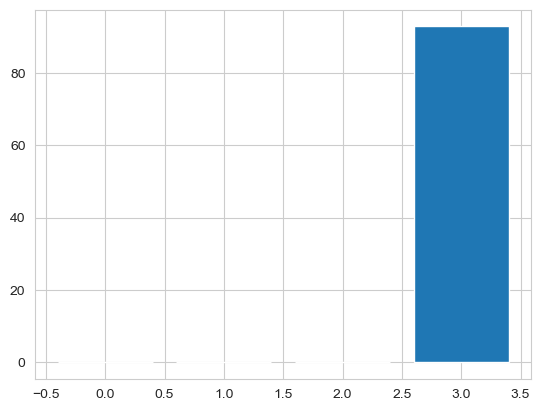

In [55]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

De acuerdo a lo evidenciado en nunestro modelo, la variable independiente número 3 es la mas significativa, la cual corresponde a "Influencer".

#### __PARTE 2:__

##### __1: Importe la base de datos de la tarea de la semana 2 (bank-additional-full)__

In [56]:
# Importamos nuestra Base de Datos.
df=pd.read_csv("bank-additional-full.csv", sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


##### __2: Escoja su variable objetivo y las variables independientes considerando un enfoque de regresión logística.__

Vamos a preparar nuestras variables, para lo cual procedemos a recodificar nuestras variables categóticas con Label Encoder.

In [57]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas =df.select_dtypes('object').columns

In [58]:
# Creamos la Instancia del Label Encoder
labelencoder = LabelEncoder()

In [59]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a re-extraer nuestras
variables explicativas y variable objetivo.

In [60]:
X_logit = df[df.columns.difference(['y'])]
y_logit = df.y

La variable objetivo que se utilizará en el modelo es la variable "y", que indica si que indica si el cliente ha aceptado realizar un depósito a plazo fijo o no.

##### __3: Realice un train/test split, separando un 90% de los datos para la submuestra de entrenamiento y 10% para la submuestra de prueba.__

In [61]:
X_train_logit , X_test_logit , y_train_logit , y_test_logit = train_test_split(X_logit , y_logit , test_size = 0.10,random_state =123)

In [62]:
print(X_train_logit.shape,"",type(X_train_logit))
print(X_train_logit.shape,"\t ",type(y_train_logit))
print(X_test_logit.shape,"",type(X_test_logit))
print(X_test_logit.shape,"\t ",type(y_test_logit))

(37069, 20)  <class 'pandas.core.frame.DataFrame'>
(37069, 20) 	  <class 'pandas.core.series.Series'>
(4119, 20)  <class 'pandas.core.frame.DataFrame'>
(4119, 20) 	  <class 'pandas.core.series.Series'>


##### __4: Entrene al modelo de regresión logística por sklearn.__

In [63]:
from sklearn.linear_model import LogisticRegression

In [66]:
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train_logit, y_train_logit)

LogisticRegression()

<h5 style=""><strong>Realizar las predicciones.</strong></h5>

In [67]:
predicciones_train_logit = modelo_logistico.predict(X_train_logit)
predicciones_test_logit  = modelo_logistico.predict(X_test_logit)

##### __5: Evalúe su modelo ¿Es este aceptable? , por ello escoja las métricas correspondientes.__

<h5 style="text-align:center;"><strong>Métricas de Evaluación.</strong></h5>

<h5 style=""><strong>Matriz de confusión</strong></h5>

In [68]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

In [69]:
cm = metrics.confusion_matrix(y_test_logit, predicciones_test_logit)
print(cm)

[[3591   80]
 [ 275  173]]


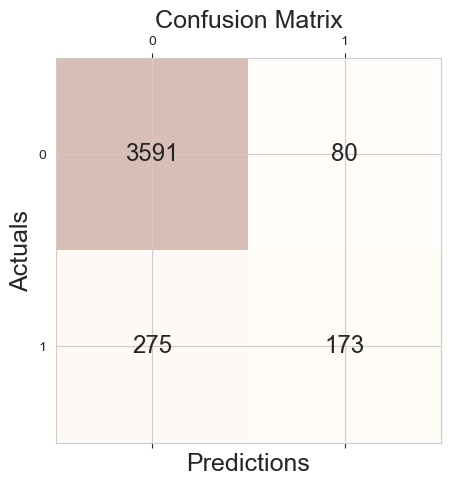

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

A partir de los resultados, observamos que el modelo es capaz de clasificar correctamente 3592+172/(3592+79+276+172)=0.9138(91%) de las observaciones de prueba

<h5 style=""><strong>Precisión o "precision".</strong></h5>

In [73]:
print('Precision: %.3f' % precision_score(y_test_logit, predicciones_test_logit))

Precision: 0.684


El modelo tiene una precision del 68%.

<h5 style=""><strong>Exhaustividad o "recall".</strong></h5>

In [74]:
print('Recall: %.3f' % recall_score(y_test_logit, predicciones_test_logit))

Recall: 0.386


<h5 style=""><strong>F1 score.</strong></h5>

In [75]:
print('F1 Score: %.3f' % f1_score(y_test_logit, predicciones_test_logit))

F1 Score: 0.494


##### __6: Identifique a las dos variables con mayor poder explicativo en el modelo ¿Cómo las identifico?__

<h5 style="text-align:center;"><strong>Feature Importance</strong></h5>

In [76]:
sc_logit = StandardScaler()

In [77]:
X_train_std_logit = sc_logit.fit_transform(X_train_logit)
X_test_std_logit = sc_logit.transform(X_test_logit)

<h5 style=""><strong>Entrenar el modelo con los datos de entrenamiento.</strong></h5>

In [78]:
modelo_logistico_std = LogisticRegression()
modelo_logistico_std.fit(X_train_std_logit, y_train_logit)

LogisticRegression()

<h5 style=""><strong>Realizar las predicciones.</strong></h5>

In [79]:
predicciones_train_logit_std = modelo_logistico_std.predict(X_train_std_logit)
predicciones_test_logit_std  = modelo_logistico_std.predict(X_test_std_logit)

<h5 style=""><strong>Extraer los coeficientes.</strong></h5>

In [80]:
importancia_logit = modelo_logistico_std.coef_[0]

In [81]:
# Resumen
for i,v in enumerate(importancia_logit):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: 0.05797
Variable explicativa No. 1, Score: -0.08466
Variable explicativa No. 2, Score: 0.11919
Variable explicativa No. 3, Score: 0.48147
Variable explicativa No. 4, Score: -0.32747
Variable explicativa No. 5, Score: 0.07930
Variable explicativa No. 6, Score: -0.15473
Variable explicativa No. 7, Score: 1.17450
Variable explicativa No. 8, Score: 0.11087
Variable explicativa No. 9, Score: -1.48018
Variable explicativa No. 10, Score: 0.97317
Variable explicativa No. 11, Score: -0.00121
Variable explicativa No. 12, Score: 0.03639
Variable explicativa No. 13, Score: -0.02025
Variable explicativa No. 14, Score: 0.07601
Variable explicativa No. 15, Score: -0.24897
Variable explicativa No. 16, Score: -0.81194
Variable explicativa No. 17, Score: -0.18870
Variable explicativa No. 18, Score: 0.16530
Variable explicativa No. 19, Score: -0.02531


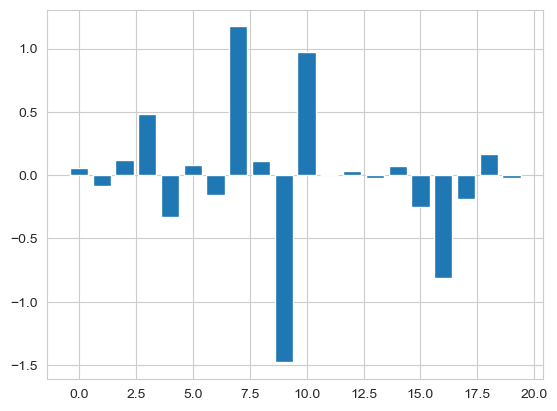

In [82]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia_logit))], importancia_logit)
plt.show()

La variable mas significa es la número N° 7 que corresponde a si el cliente fue contactado o no para esta campaña.